In [1]:
#import the libs 
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [15]:
#variables
x_temp                      = ctrl.Antecedent(np.arange(0,31,1),'temp')             # Temperatura
x_vel_wind                  = ctrl.Antecedent(np.arange(0,13,1),'vel_wind')         # Velocidad Viento
x_rain_prevition            = ctrl.Consequent(np.arange(0,101,1),'rain_prevition')  # Prevision Lluvia

x_temp['temp_vl']           = fuzz.trimf(x_temp.universe, [0,0,7.5])                # Muy bajo
x_temp['temp_l']            = fuzz.trimf(x_temp.universe, [0,7.5,15])               # Bajo
x_temp['temp_n']            = fuzz.trimf(x_temp.universe, [7.5,15,22.5])            # Normal
x_temp['temp_h']            = fuzz.trimf(x_temp.universe, [15,22.5,30])             # Alto
x_temp['temp_vh']           = fuzz.trimf(x_temp.universe, [22.5,30,30])             # Muy Alto

x_vel_wind['vel_wind_vl']   = fuzz.trimf(x_vel_wind.universe, [0,0,3])              #Muy bajo
x_vel_wind['vel_wind_l']    = fuzz.trimf(x_vel_wind.universe, [0,3,6])              # Bajo
x_vel_wind['vel_wind_n']    = fuzz.trimf(x_vel_wind.universe, [3,6,9])              # Normal
x_vel_wind['vel_wind_h']    = fuzz.trimf(x_vel_wind.universe, [6,9,12])             # Alto
x_vel_wind['vel_wind_vh']   = fuzz.trimf(x_vel_wind.universe, [9,12,12])            # Muy Alto

x_rain_prevition['p_ll_vl'] = fuzz.trimf(x_rain_prevition.universe, [0,0,25])       #Muy bajo
x_rain_prevition['p_ll_l']  = fuzz.trimf(x_rain_prevition.universe, [0,25,50])      # Bajo
x_rain_prevition['p_ll_n']  = fuzz.trimf(x_rain_prevition.universe, [25,50,75])     # Normal
x_rain_prevition['p_ll_h']  = fuzz.trimf(x_rain_prevition.universe, [50,75,100])    # Alto
x_rain_prevition['p_ll_vh'] = fuzz.trimf(x_rain_prevition.universe, [75,100,100])   # Muy Alto

In [16]:
# REGLAS DE OPERACION 

regla1  = ctrl.Rule(x_temp['temp_vl']  | x_vel_wind['vel_wind_vl'], x_rain_prevition['p_ll_vl'])
regla2  = ctrl.Rule(x_temp['temp_vl']  | x_vel_wind['vel_wind_l'], x_rain_prevition['p_ll_vl'])
regla3  = ctrl.Rule(x_temp['temp_vl']  | x_vel_wind['vel_wind_n'], x_rain_prevition['p_ll_l'])
regla4  = ctrl.Rule(x_temp['temp_vl']  | x_vel_wind['vel_wind_h'], x_rain_prevition['p_ll_l'])
regla5  = ctrl.Rule(x_temp['temp_vl']  | x_vel_wind['vel_wind_vh'], x_rain_prevition['p_ll_n'])

regla11 = ctrl.Rule(x_temp['temp_l']  | x_vel_wind['vel_wind_vl'], x_rain_prevition['p_ll_vl'])
regla12 = ctrl.Rule(x_temp['temp_l']  | x_vel_wind['vel_wind_l'], x_rain_prevition['p_ll_vl'])
regla13 = ctrl.Rule(x_temp['temp_l']  | x_vel_wind['vel_wind_n'], x_rain_prevition['p_ll_l'])
regla14 = ctrl.Rule(x_temp['temp_l']  | x_vel_wind['vel_wind_h'], x_rain_prevition['p_ll_n'])
regla15 = ctrl.Rule(x_temp['temp_l']  | x_vel_wind['vel_wind_vh'], x_rain_prevition['p_ll_n'])

regla21 = ctrl.Rule(x_temp['temp_n']  | x_vel_wind['vel_wind_vl'], x_rain_prevition['p_ll_l'])
regla22 = ctrl.Rule(x_temp['temp_n']  | x_vel_wind['vel_wind_l'], x_rain_prevition['p_ll_l'])
regla23 = ctrl.Rule(x_temp['temp_n']  | x_vel_wind['vel_wind_n'], x_rain_prevition['p_ll_n'])
regla24 = ctrl.Rule(x_temp['temp_n']  | x_vel_wind['vel_wind_h'], x_rain_prevition['p_ll_n'])
regla25 = ctrl.Rule(x_temp['temp_n']  | x_vel_wind['vel_wind_vh'], x_rain_prevition['p_ll_h'])

regla31 = ctrl.Rule(x_temp['temp_h']  | x_vel_wind['vel_wind_vl'], x_rain_prevition['p_ll_l'])
regla32 = ctrl.Rule(x_temp['temp_h']  | x_vel_wind['vel_wind_l'], x_rain_prevition['p_ll_n'])
regla33 = ctrl.Rule(x_temp['temp_h']  | x_vel_wind['vel_wind_n'], x_rain_prevition['p_ll_n'])
regla34 = ctrl.Rule(x_temp['temp_h']  | x_vel_wind['vel_wind_h'], x_rain_prevition['p_ll_h'])
regla35 = ctrl.Rule(x_temp['temp_h']  | x_vel_wind['vel_wind_vh'], x_rain_prevition['p_ll_h'])

regla41 = ctrl.Rule(x_temp['temp_vh'] | x_vel_wind['vel_wind_vl'], x_rain_prevition['p_ll_n'])
regla42 = ctrl.Rule(x_temp['temp_vh'] | x_vel_wind['vel_wind_l'], x_rain_prevition['p_ll_n'])
regla43 = ctrl.Rule(x_temp['temp_vh'] | x_vel_wind['vel_wind_n'], x_rain_prevition['p_ll_h'])
regla44 = ctrl.Rule(x_temp['temp_vh'] | x_vel_wind['vel_wind_h'], x_rain_prevition['p_ll_h'])
regla45 = ctrl.Rule(x_temp['temp_vh'] | x_vel_wind['vel_wind_vh'], x_rain_prevition['p_ll_vh'])

In [20]:
# Agregacion de variables al systema

ctrl_rain_pred = ctrl.ControlSystem([regla1,regla2,regla3,regla4,regla5,regla11,
                                regla12,regla13,regla14,regla15,regla21,
                                regla22,regla23,regla24,regla25,regla31,
                                regla32,regla33,regla34,regla35,regla41,
                                regla42,regla43,regla43,regla44,regla45])



rain_pred_est = ctrl.ControlSystemSimulation(ctrl_rain_pred)

In [18]:
# Input de valores

rain_pred_est.input['vel_wind'] = 7
rain_pred_estinput['temp'] = 15

rain_pred_est.compute()

In [19]:
# Resultado

print(rain_pred_est.output['rain_prevition'])

50.000000000000014


C:\Users\Mauri\anaconda3\envs\data\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


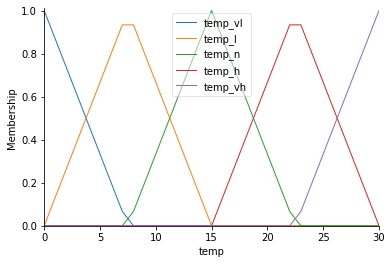

In [9]:
x_temp.view()

C:\Users\Mauri\anaconda3\envs\data\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


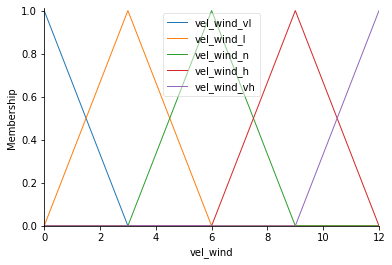

In [4]:
x_vel_wind.view()

C:\Users\Mauri\anaconda3\envs\data\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


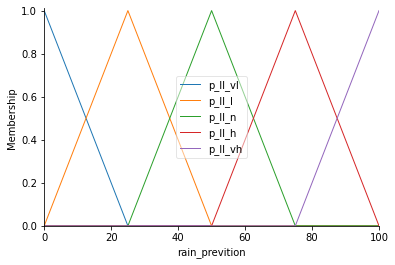

In [5]:
x_rain_prevition.view()